In [1]:
%pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tensorflow

# About Dataset
Musical Notes Classification
Preparing Datasets for classification of Musical notes.

**Classes**
There are five different music symbols considered for the classification. All categories have 1000 numbers of data.

* Whole Note
* Half Note
* Quarter Note
* Eight Note
* Sixteenth Note

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import os
import tensorflow as tf
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

# from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.optimizers import RMSprop
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau

# Labelling Data
*  Whole = 0
* Half = 1
* Quarter = 2
* Eight = 3
* Sixteenth = 4

In [4]:
label_number = {'Whole': 0,'Half': 1,'Quarter': 2,'Eight': 3,'Sixteenth': 4}
label_word = ['Whole','Half','Quarter','Eight','Sixteenth']

In [6]:
import pandas as pd

# dataframed = pd.DataFrame(columns = ['path', 'label'])
tdf = []

for dirname, _, filenames in os.walk('./input/music-notes-datasets/datasets/datasets/Notes'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        name = dirname.split('\\')[-1]
        label = label_number[name]
        tdf.append({'path' : path, 'label' : label})
        # dataframed = dataframed.append({'path' : path, 'label' : label}, ignore_index = True)

dataframed = pd.DataFrame(tdf, columns=['path', 'label'])

In [7]:
dataframed.head()
print(dataframed)
len(dataframed)

                                                   path  label
0     ./input/music-notes-datasets/datasets/datasets...      3
1     ./input/music-notes-datasets/datasets/datasets...      3
2     ./input/music-notes-datasets/datasets/datasets...      3
3     ./input/music-notes-datasets/datasets/datasets...      3
4     ./input/music-notes-datasets/datasets/datasets...      3
...                                                 ...    ...
4995  ./input/music-notes-datasets/datasets/datasets...      0
4996  ./input/music-notes-datasets/datasets/datasets...      0
4997  ./input/music-notes-datasets/datasets/datasets...      0
4998  ./input/music-notes-datasets/datasets/datasets...      0
4999  ./input/music-notes-datasets/datasets/datasets...      0

[5000 rows x 2 columns]


5000

# Sample Images : Whole note (10 Samples)

visual variants of the Whole note

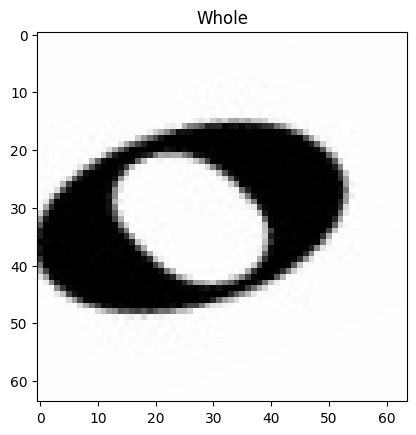

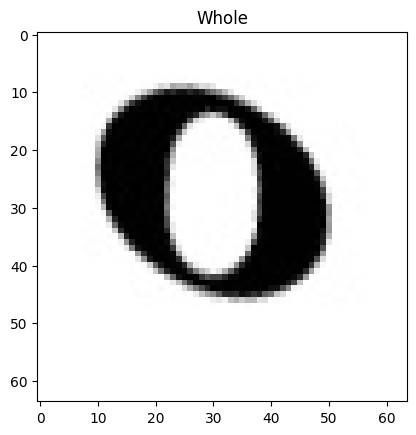

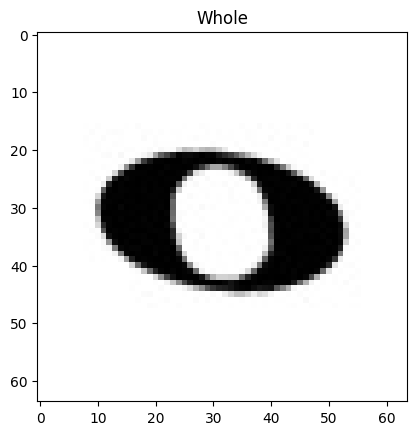

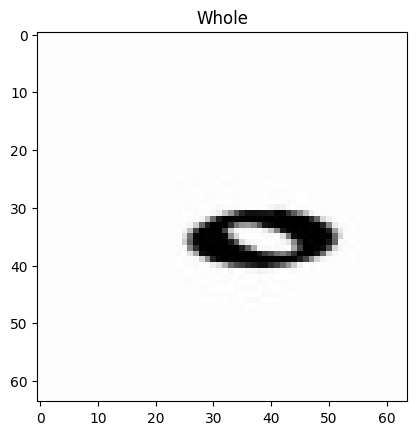

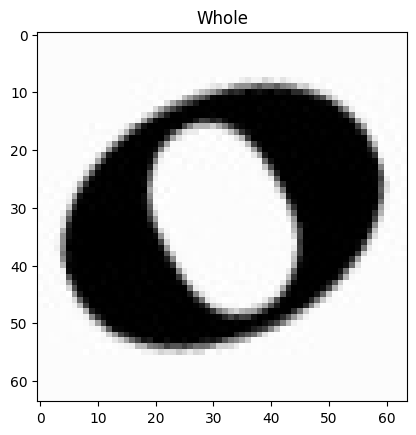

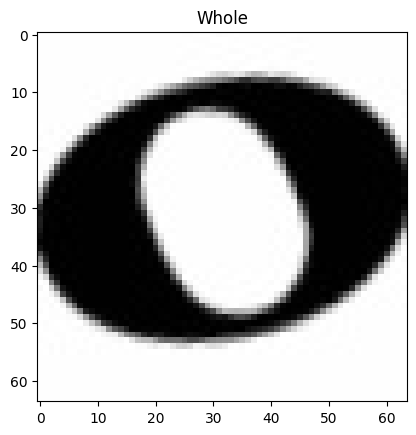

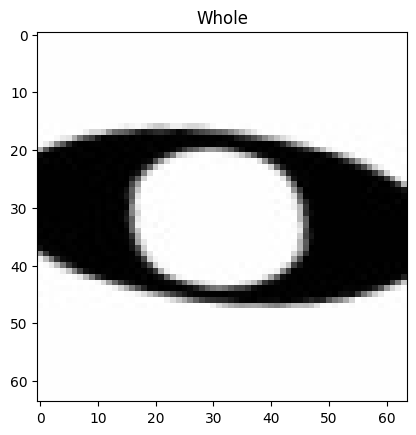

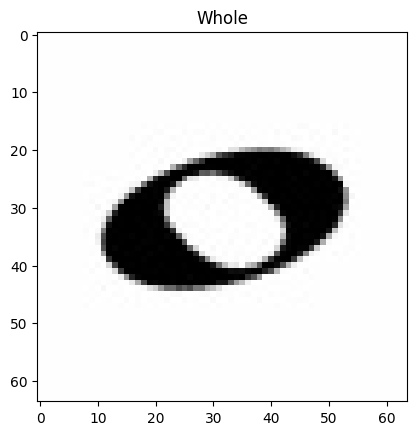

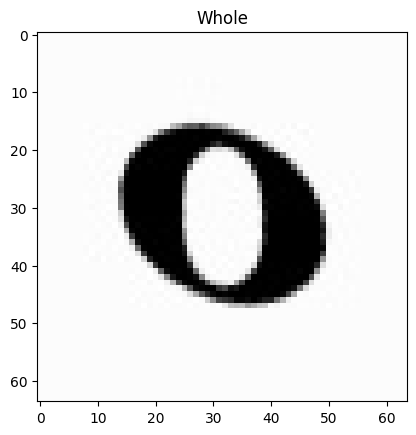

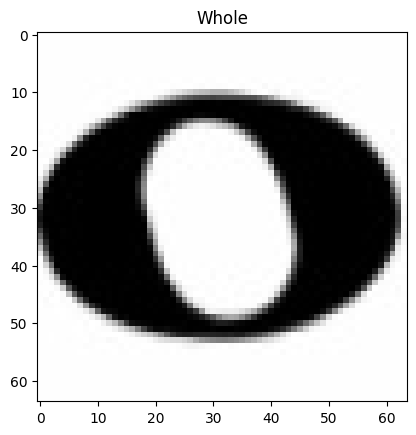

In [8]:
import matplotlib.image as mpimg
listed = list(np.where(dataframed["label"] == 0))
listed = listed[0].tolist()
for x in range(0, 10) :
        img = mpimg.imread(dataframed.iloc[int(listed[x])]['path'])
        plt.subplots()
        plt.imshow(img)
        plt.title("Whole")

# Sample Images : Half Notes (10 Samples)
visual variants of the Half note

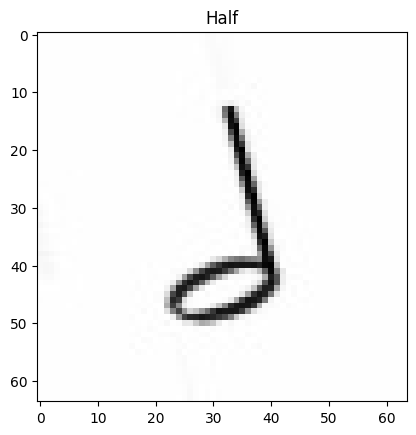

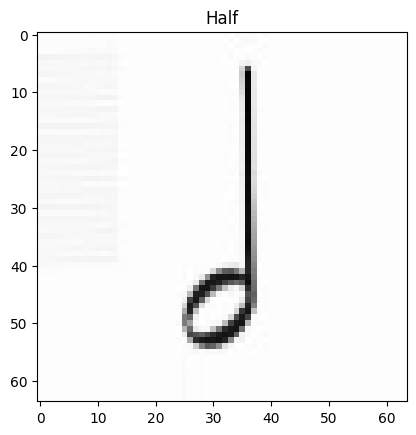

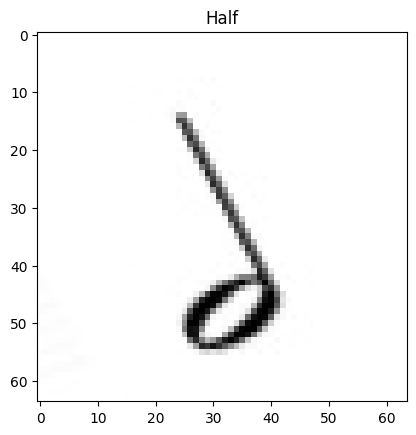

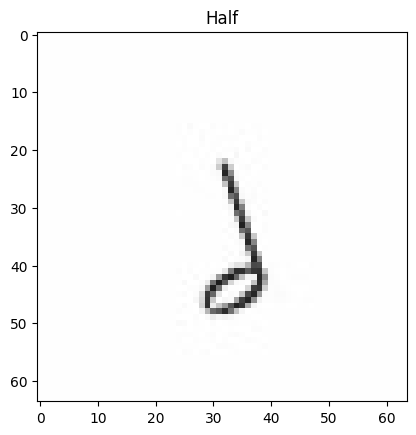

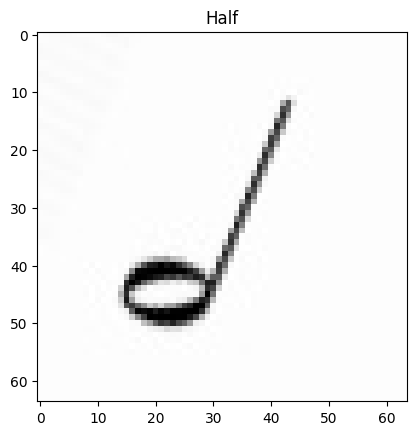

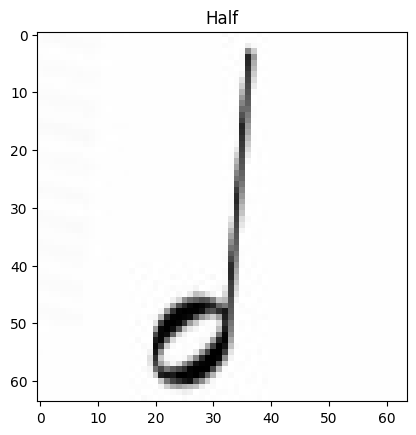

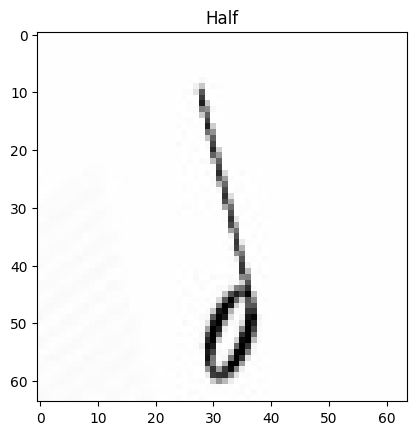

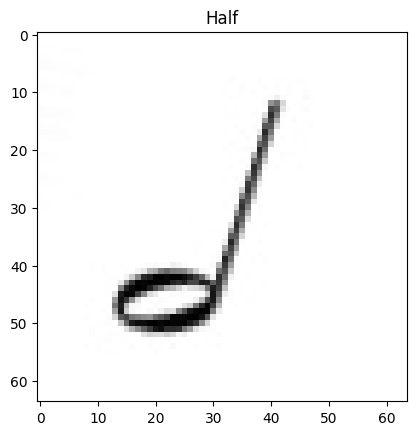

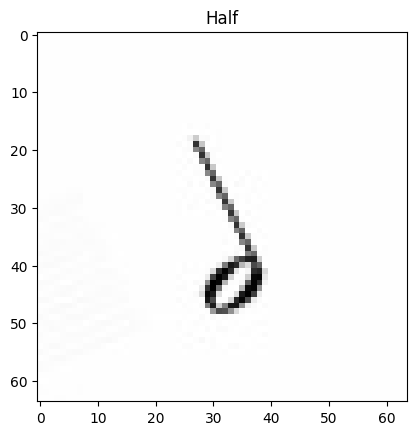

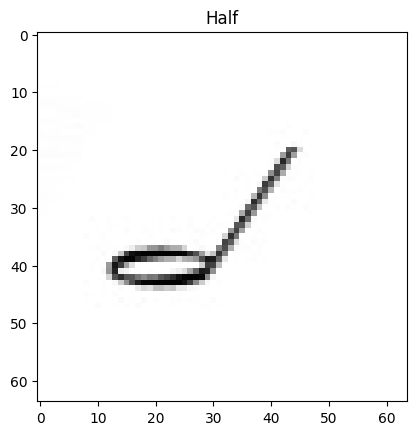

In [9]:
listed = list(np.where(dataframed["label"] == 1))
listed = listed[0].tolist()
for x in range(0, 10) :
        img = mpimg.imread(dataframed.iloc[int(listed[x])]['path'])
        plt.subplots()
        plt.imshow(img)
        plt.title("Half")

# Sample Images : Quarter Notes (10 Samples)
visual variants of the Quarter note

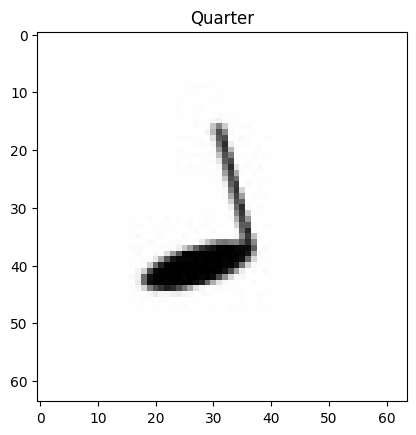

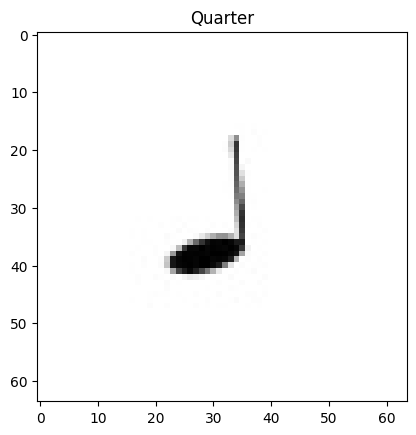

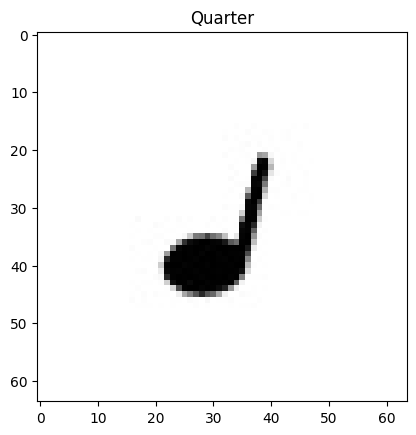

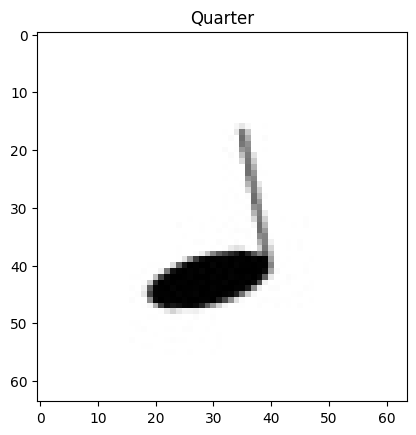

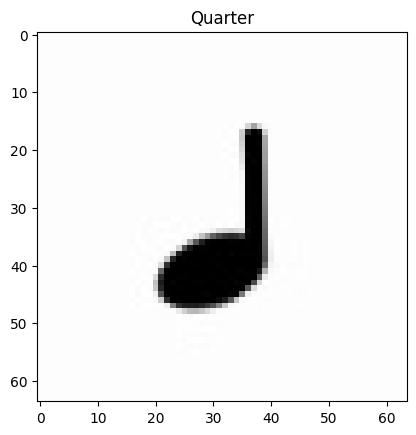

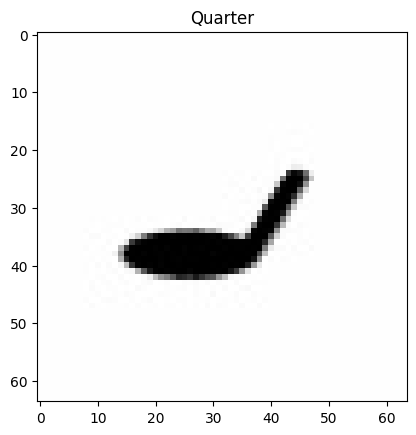

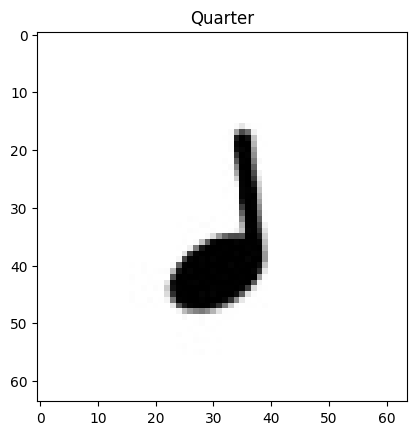

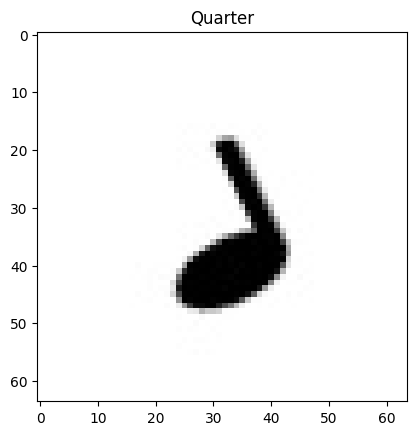

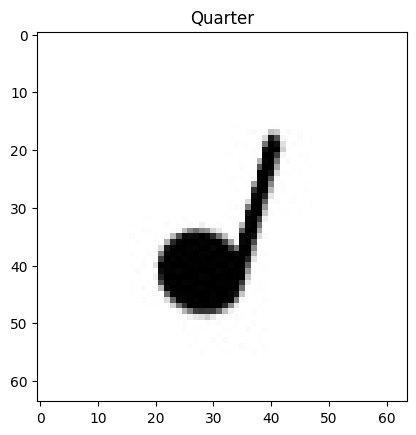

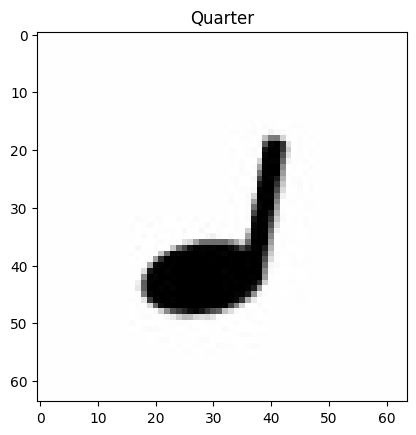

In [10]:
listed = list(np.where(dataframed["label"] == 2))
listed = listed[0].tolist()
for x in range(0, 10) :
        img = mpimg.imread(dataframed.iloc[int(listed[x])]['path'])
        plt.subplots()
        plt.imshow(img)
        plt.title("Quarter")

# Sample Images : Eight Notes (10 Samples)
visual variants of the Eight note

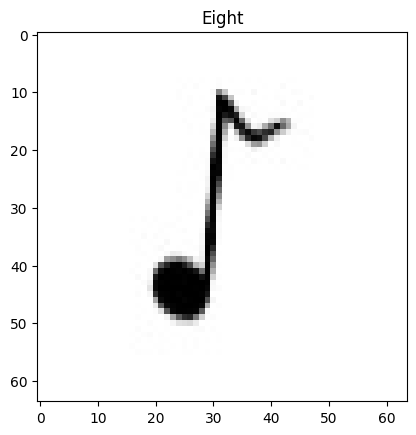

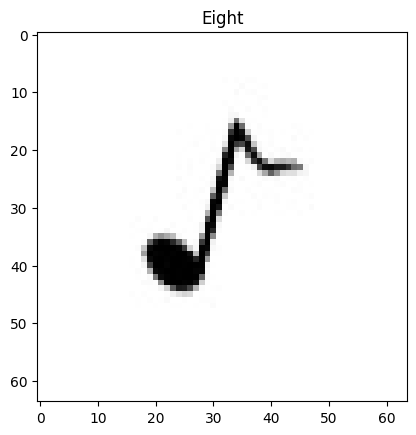

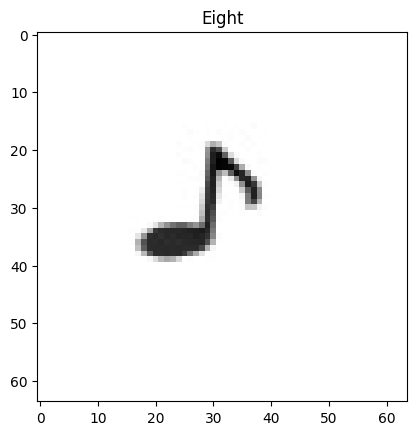

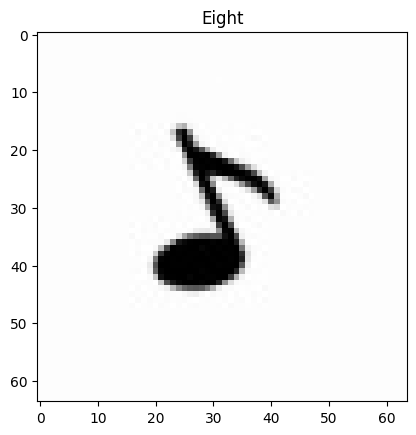

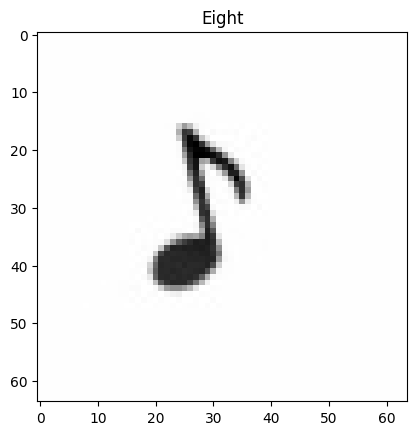

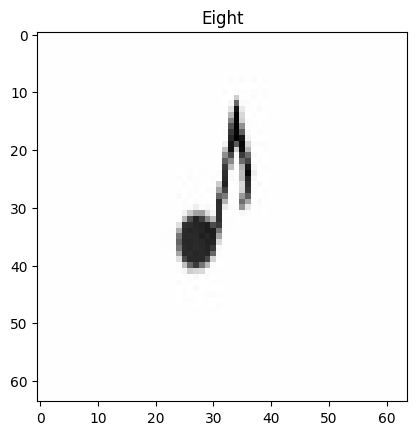

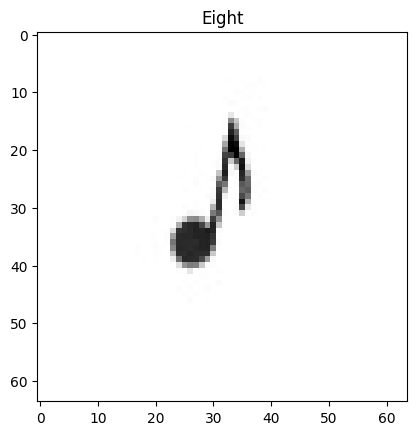

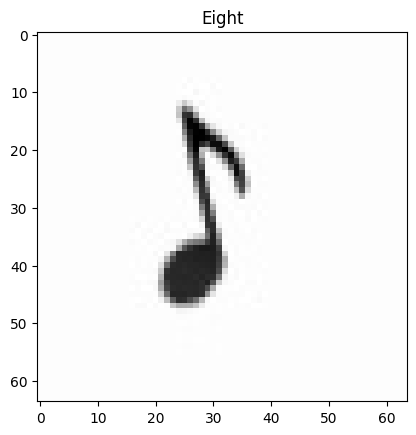

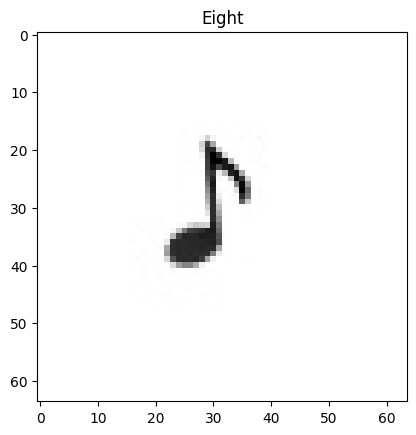

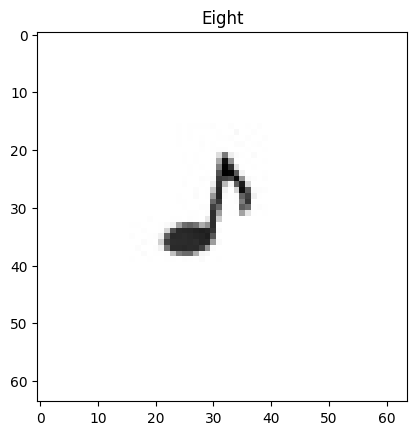

In [11]:
listed = list(np.where(dataframed["label"] == 3))
listed = listed[0].tolist()
for x in range(0, 10) :
        img = mpimg.imread(dataframed.iloc[int(listed[x])]['path'])
        plt.subplots()
        plt.imshow(img)
        plt.title("Eight")

# Sample Images : Sixteenth Notes (10 Samples)
visual variants of the sixteenth note

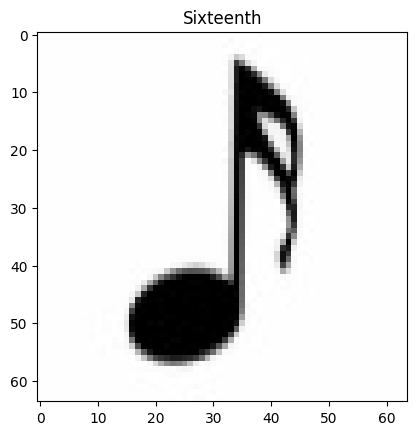

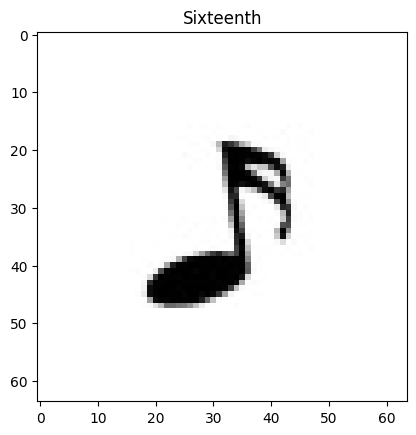

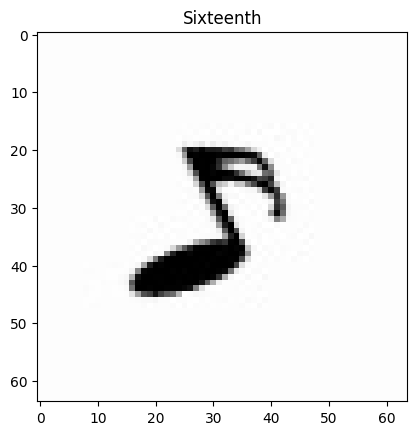

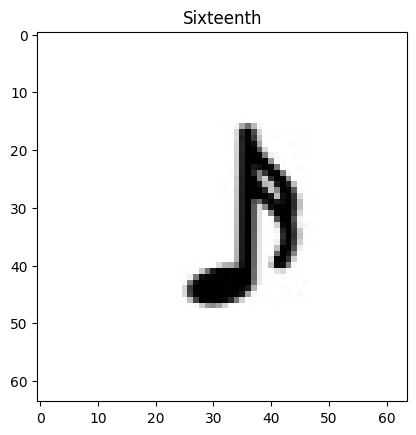

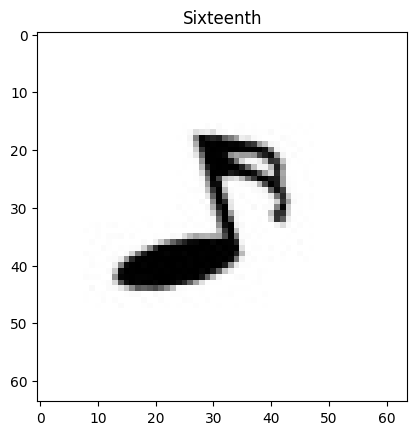

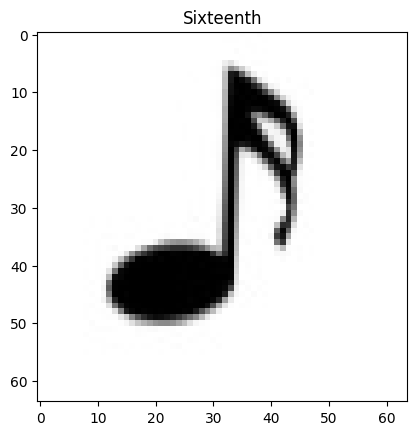

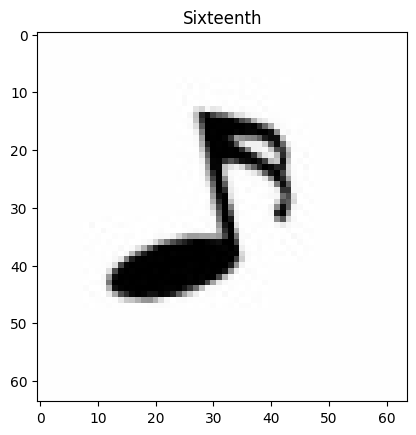

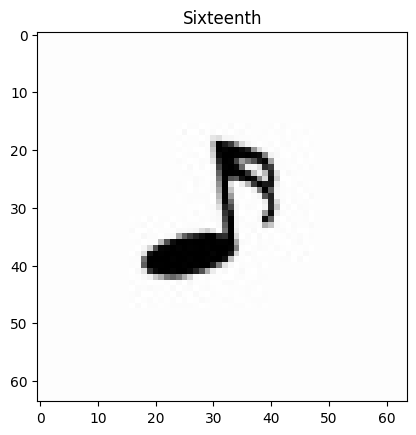

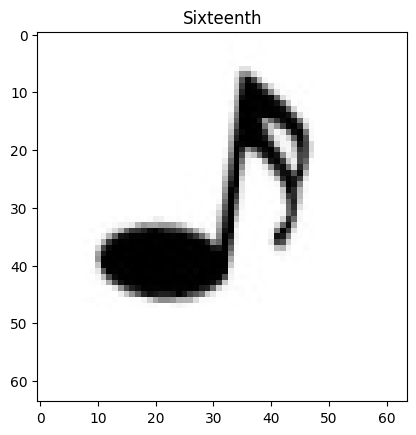

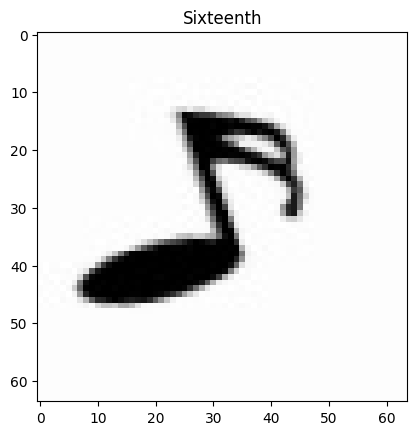

In [12]:
listed = list(np.where(dataframed["label"] == 4))
listed = listed[0].tolist()
for x in range(0, 10) :
        img = mpimg.imread(dataframed.iloc[int(listed[x])]['path'])
        plt.subplots()
        plt.imshow(img)
        plt.title("Sixteenth")

# Split The Data for Training and Testing Purposes

**Test Sizes**
* 20%

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataframed, test_size=0.2, random_state = 42)

# Contents of Training Data

In [14]:
train.head()

,path,label
4227,./input/music-notes-datasets/datasets/datasets...,0
4676,./input/music-notes-datasets/datasets/datasets...,0
800,./input/music-notes-datasets/datasets/datasets...,3
3671,./input/music-notes-datasets/datasets/datasets...,4
4193,./input/music-notes-datasets/datasets/datasets...,0


# Contents of Testing Data

In [15]:
test.head()

,path,label
1501,./input/music-notes-datasets/datasets/datasets...,1
2586,./input/music-notes-datasets/datasets/datasets...,2
2653,./input/music-notes-datasets/datasets/datasets...,2
1055,./input/music-notes-datasets/datasets/datasets...,1
705,./input/music-notes-datasets/datasets/datasets...,3


# Preprocessing Image Data 

In [17]:
# from tensorflow.keras.preprocessing.image import load_img
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import load_img


class splitinator(tf.keras.utils.Sequence):
       
    def __init__(self, batch_size, img_width, img_height, data):
        self.bs = batch_size
        self.h = img_height
        self.w = img_width
        self.path = data['path'].values
        self.label = data['label'].values
        
    def __len__(self):
        return len(self.path) // self.bs
    
    def __getitem__(self, idx):
        
        i = idx * self.bs
        batch_paths = self.path[i : i + self.bs]
        batch_labels = self.label[i : i + self.bs]
        
        X = np.zeros((self.bs, self.h, self.w, 3), dtype="float32")
        y = np.zeros((self.bs, 5), dtype="int32")
        
        for j in range(self.bs): 
            img = load_img(batch_paths[j], color_mode = "rgb", target_size=(self.h, self.w)) # color_mode = "grayscale" 
            img = np.array(img, dtype = 'float32') 
            img = 1-img/127.5
            X[j] = img     
            y[j,batch_labels[j]] = 1  
        return X, y

In [18]:
train_generated = splitinator(5, 224, 224, train)

test_generated = splitinator(5, 224, 224, test)

In [19]:
batch = test_generated[3]

image_data = batch[0]

image_class_label = batch[1]

print("images in batch = ", image_data.shape)
print("labels in batch = ", image_class_label.shape)

images in batch =  (5, 224, 224, 3)
labels in batch =  (5, 5)


In [20]:
print(train_generated)

# TensorFlow Model : Music Note Classifier
**Consists of 11 Layers :**
1. **AL : 2D convolution layer**
2. **AL : 2D convolution layer**
3. **AL : 2D Max pooling operation**
4. **AL : 2D convolution layer**
5. **AL : 2D convolution layer**
6. **AL : 2D convolution layer**
7. **AL : 2D convolution layer**
8. **AL : 2D Max pooling operation**
9. **AL : Flatten Layer**
10. **AL : Densely-connected NN layer**
11. **AL : Densely-connected NN layer**


In [21]:
from tensorflow import keras
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

Music_Note_Classifier = Sequential()
Music_Note_Classifier.add(Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)))
Music_Note_Classifier.add(Conv2D(4, (4, 4), activation='relu'))
Music_Note_Classifier.add(MaxPooling2D((2, 2)))
Music_Note_Classifier.add(Conv2D(4, (3, 3), activation='relu'))
Music_Note_Classifier.add(Conv2D(4, (3, 3), activation='relu'))
Music_Note_Classifier.add(Conv2D(3, (3, 3), activation='relu'))
Music_Note_Classifier.add(Conv2D(3, (3, 3), activation='relu'))
Music_Note_Classifier.add(MaxPooling2D((2, 2)))
Music_Note_Classifier.add(Flatten())
Music_Note_Classifier.add(Dense(32, activation='relu'))
Music_Note_Classifier.add(Dense(5,activation='softmax'))

C:\Users\nikgo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\nikgo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


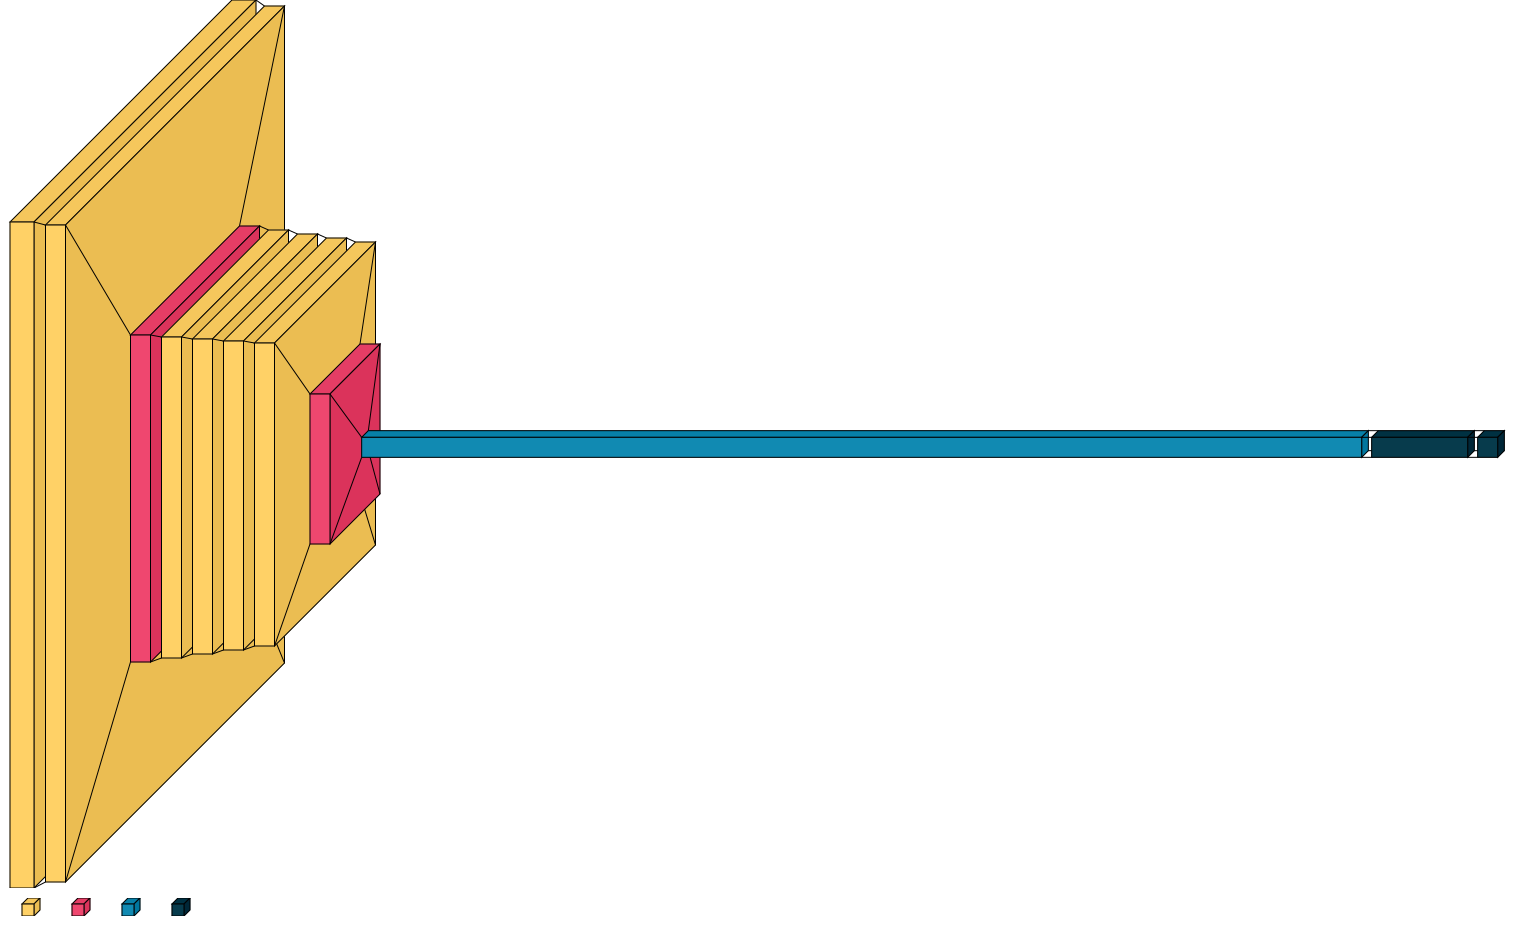

In [22]:
import visualkeras

visualkeras.layered_view(Music_Note_Classifier, legend = True, scale_xy=3, scale_z=3, max_z=1000,)

In [23]:
Music_Note_Classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 219, 219, 4)    │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 109, 4)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 107, 107, 4)    │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 105, 105, 4)    │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 103, 103, 3)    │           111 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 101, 101, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       240,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,428 (943.08 KB)

 Trainable params: 241,428 (943.08 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
Music_Note_Classifier.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [25]:
Music_Note_Classifier.fit(train_generated, epochs=10, validation_data=test_generated, verbose=1)

Epoch 1/10
  5/800 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4240 - loss: 1.5449    

C:\Users\nikgo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5774 - loss: 0.9751 - val_accuracy: 0.8390 - val_loss: 0.4431
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8880 - loss: 0.2937 - val_accuracy: 0.9590 - val_loss: 0.1286
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9563 - loss: 0.1516 - val_accuracy: 0.9280 - val_loss: 0.2329
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9818 - loss: 0.0575 - val_accuracy: 0.9560 - val_loss: 0.1159
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9836 - loss: 0.0467 - val_accuracy: 0.9760 - val_loss: 0.0743
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9922 - loss: 0.0307 - val_accuracy: 0.9720 - val_loss: 0.0792
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9937 - loss: 0.0260 - val_accuracy: 0.9810 - val_loss: 0.0540
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9958 - loss: 0.0146 - val_accurac

# Loss and Accuracy Metrics

In [26]:
print("Loss of the model is - " , Music_Note_Classifier.evaluate(test_generated)[0])
print("Accuracy of the model is - " , Music_Note_Classifier.evaluate(test_generated)[1]*100 , "%")

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9876 - loss: 0.0468
Loss of the model is -  0.041070904582738876
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9876 - loss: 0.0468
Accuracy of the model is -  98.90000224113464 %


In [27]:
path = './input/music-notes-datasets/datasets/datasets/Notes/Quarter/q114.jpg'

img = load_img(path , color_mode = "rgb", target_size=(224, 224))
img = np.array(img, dtype = 'float32') 
img = 1-img/127.5

img = img.reshape(1,224,224,3)

y1 = Music_Note_Classifier.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [28]:
s = np.argmax(y1)

print(label_word[s])

Quarter


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\nikgo\AppData\Local\Temp\ipykernel_25280\2486520339.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


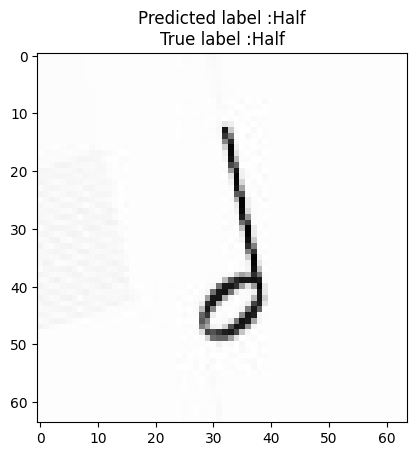

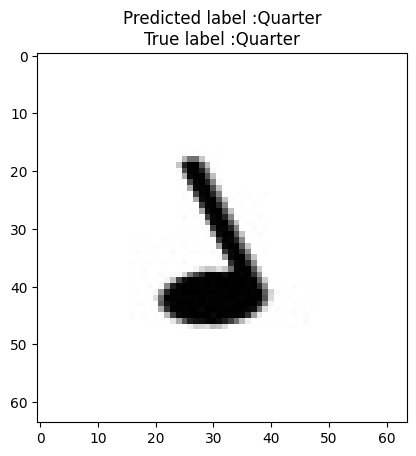

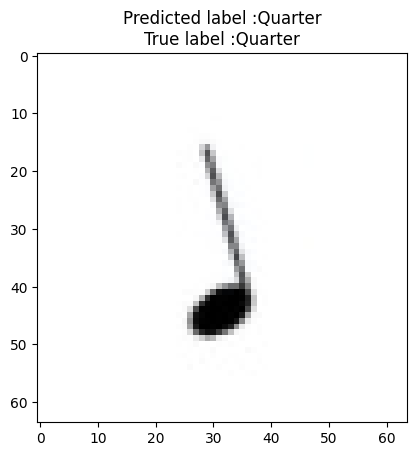

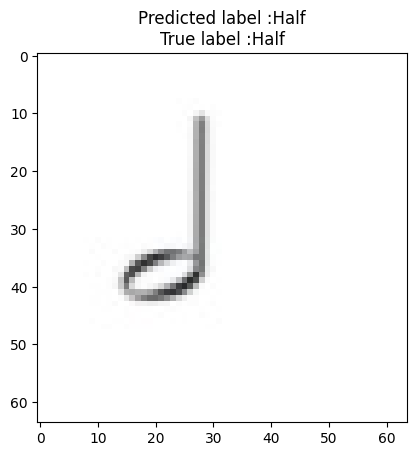

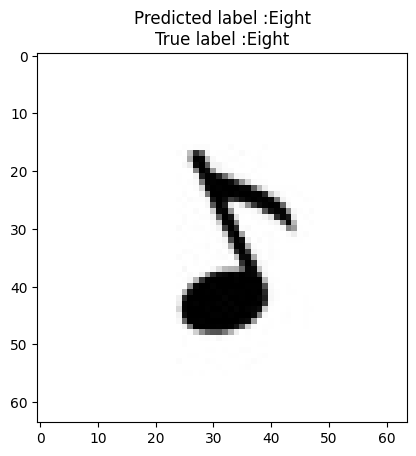

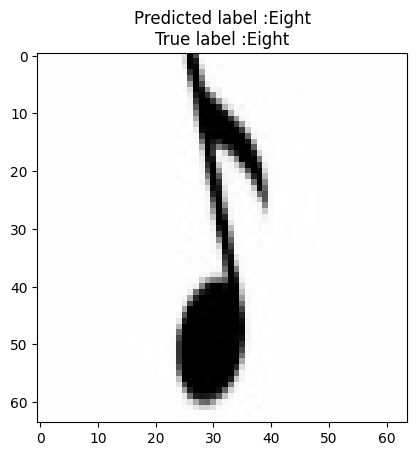

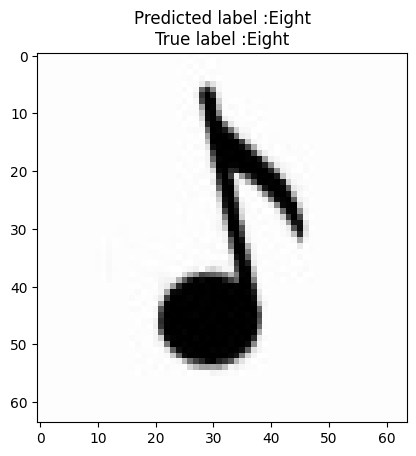

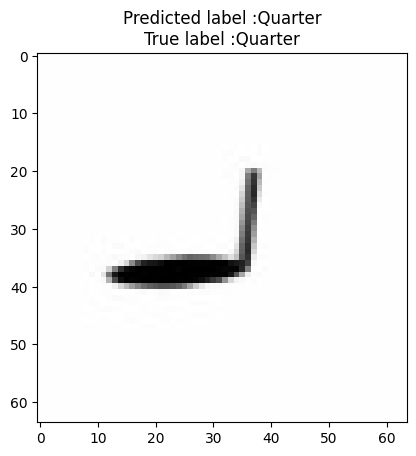

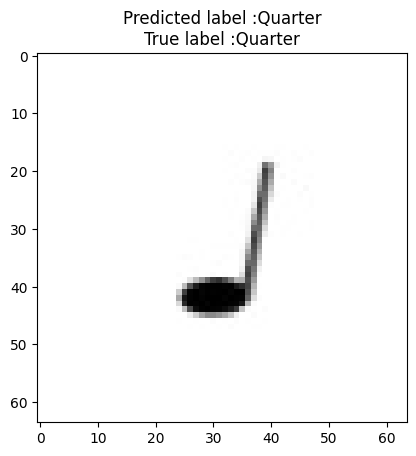

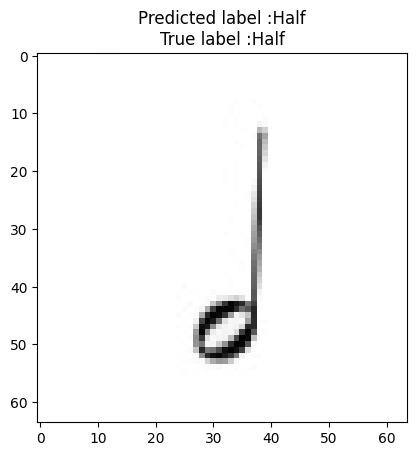

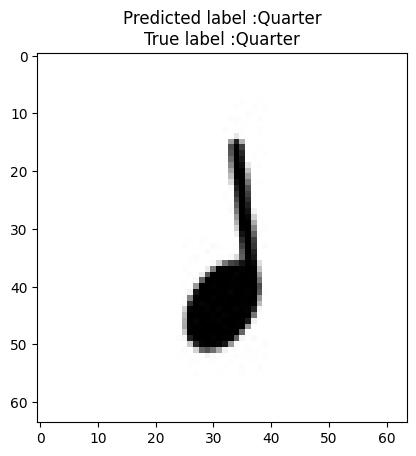

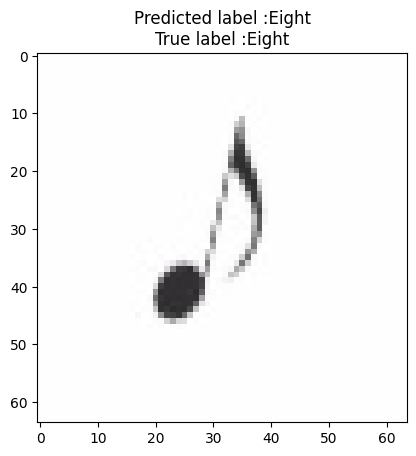

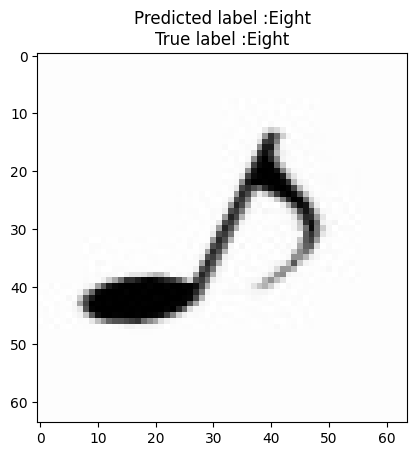

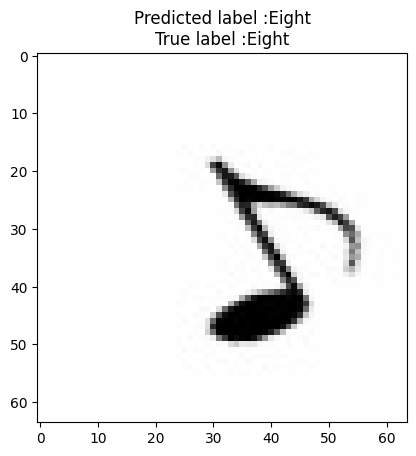

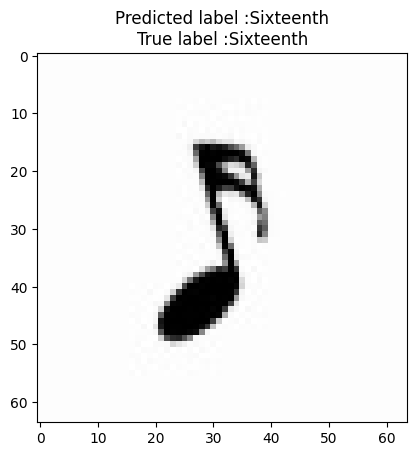

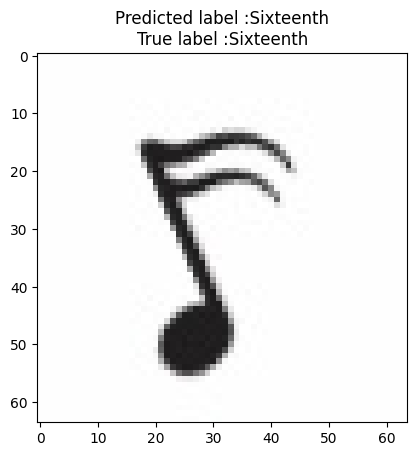

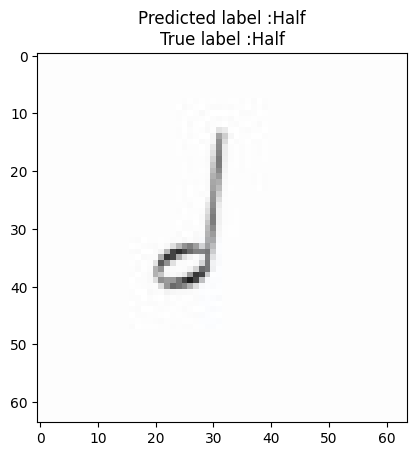

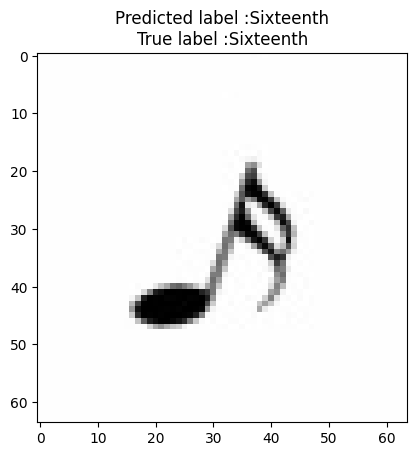

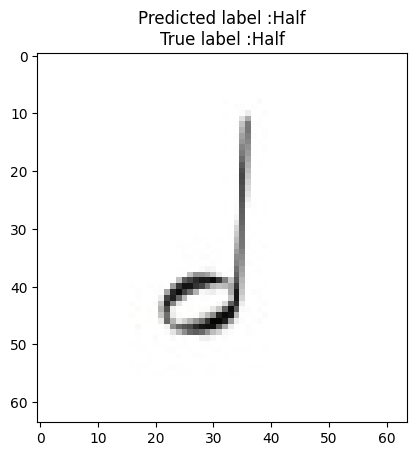

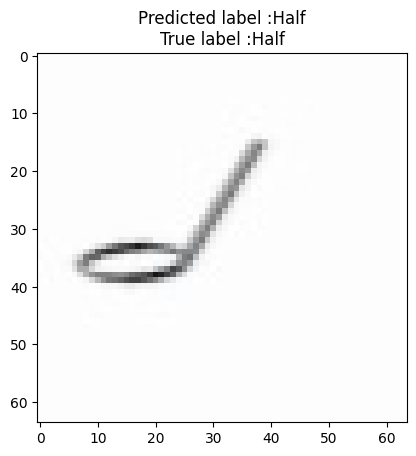

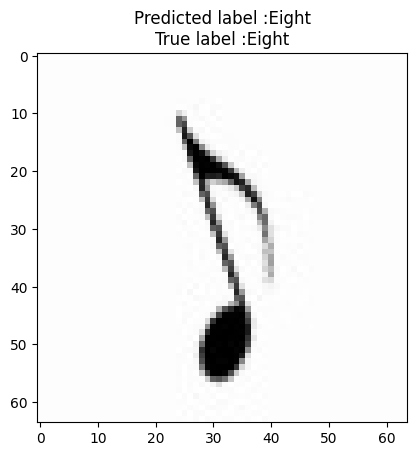

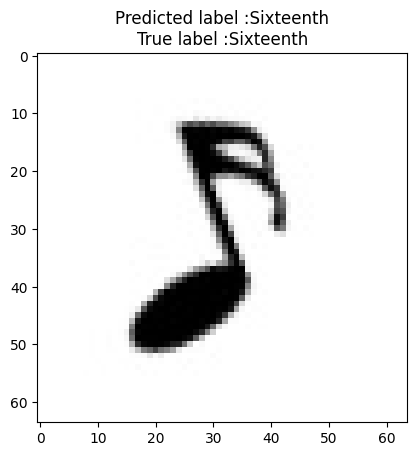

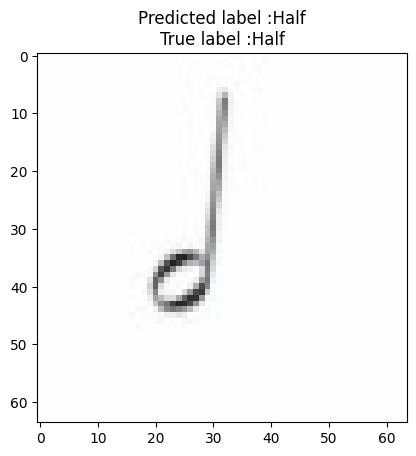

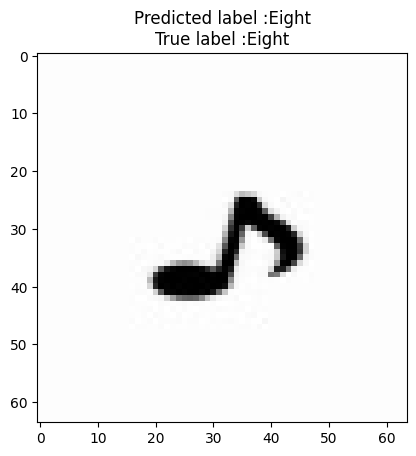

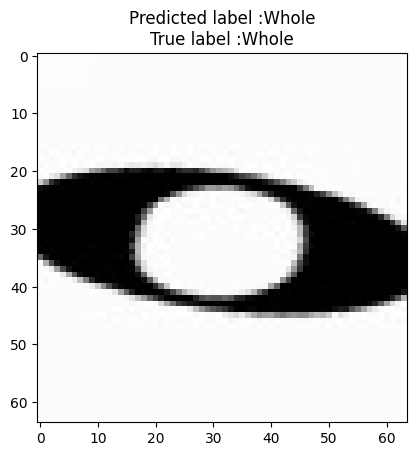

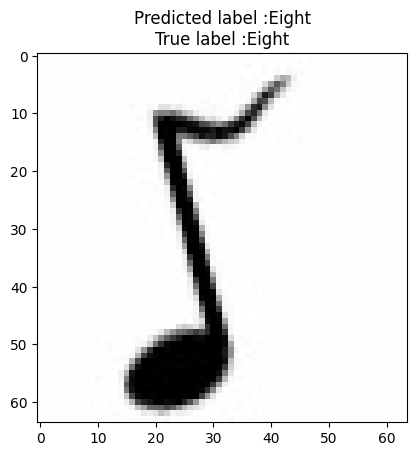

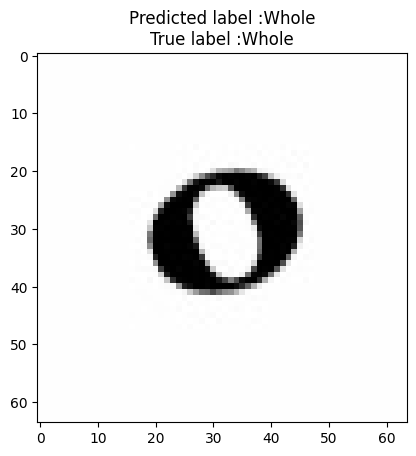

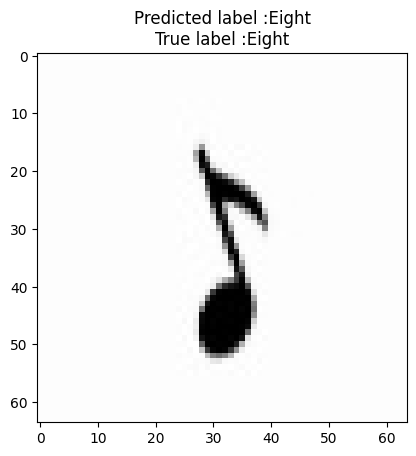

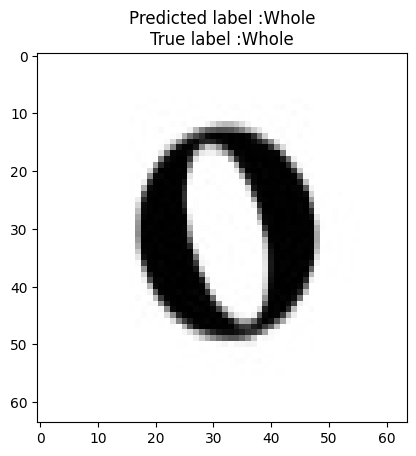

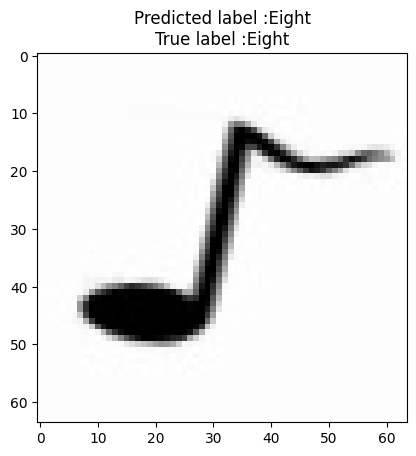

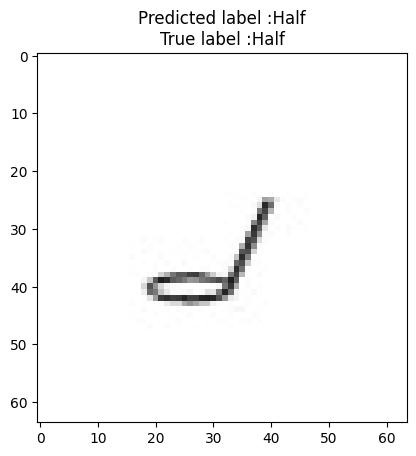

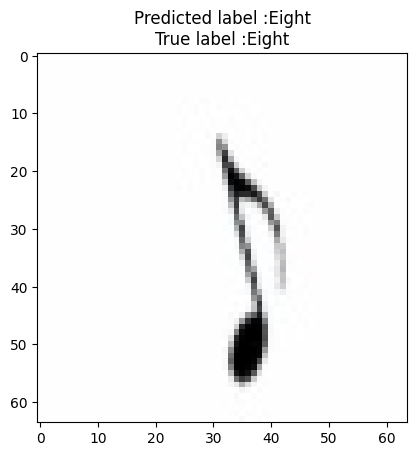

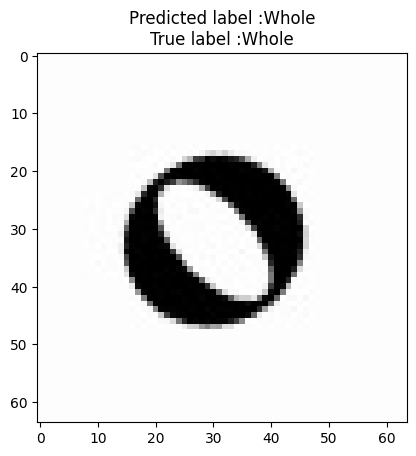

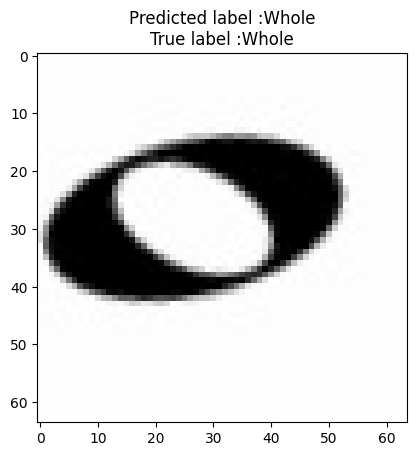

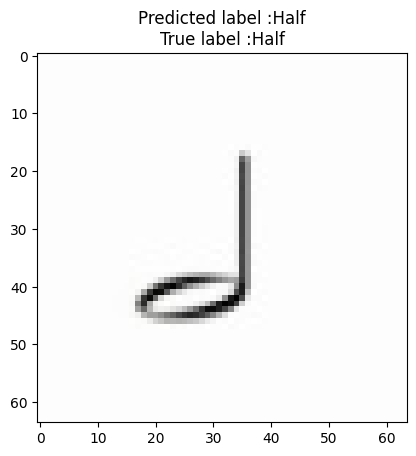

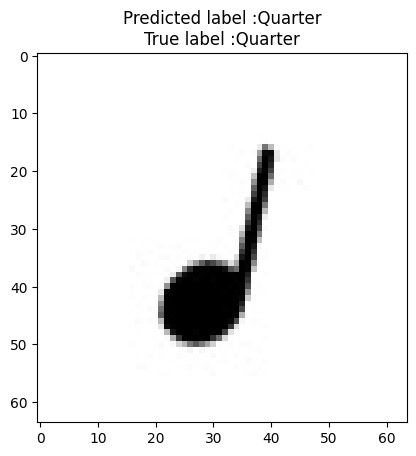

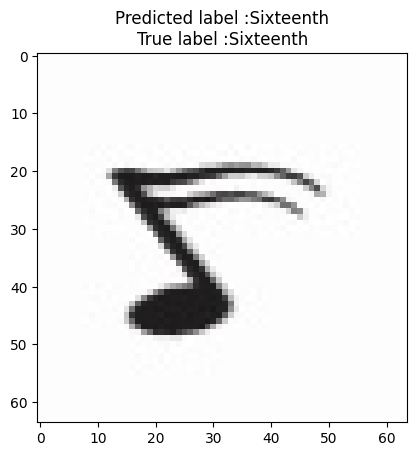

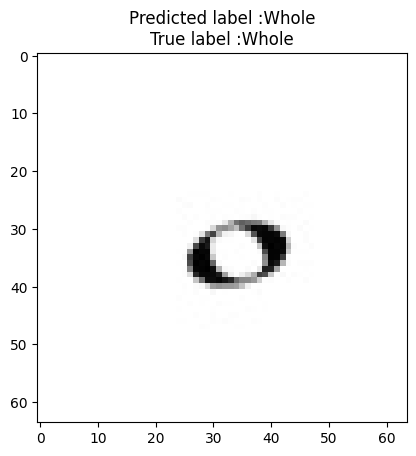

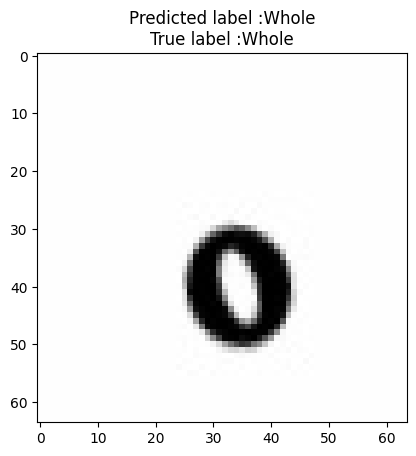

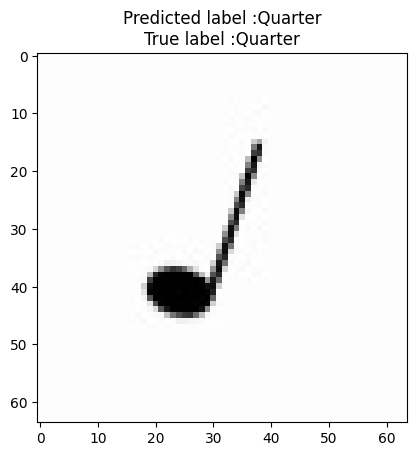

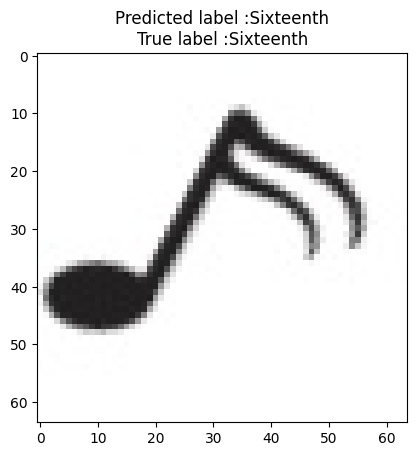

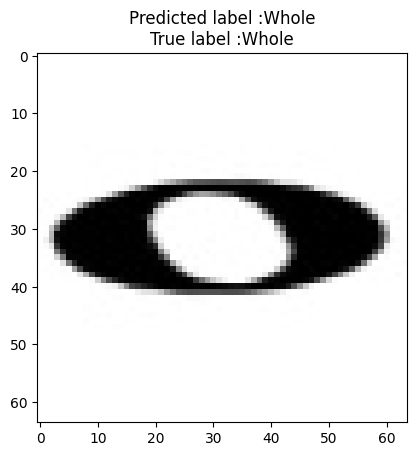

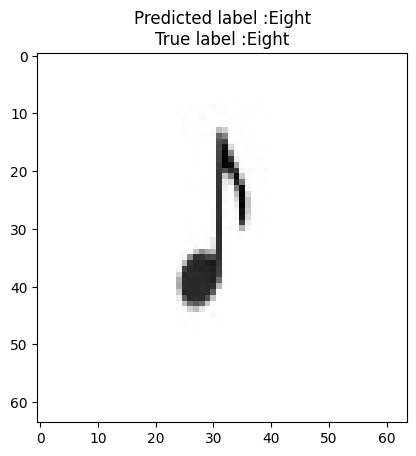

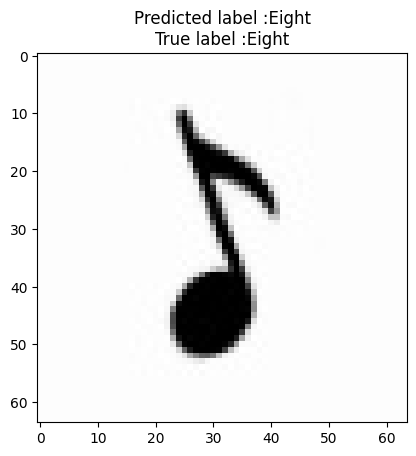

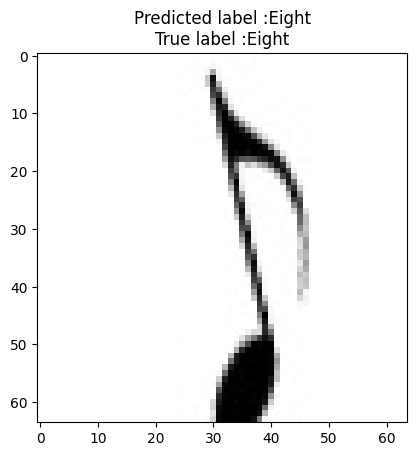

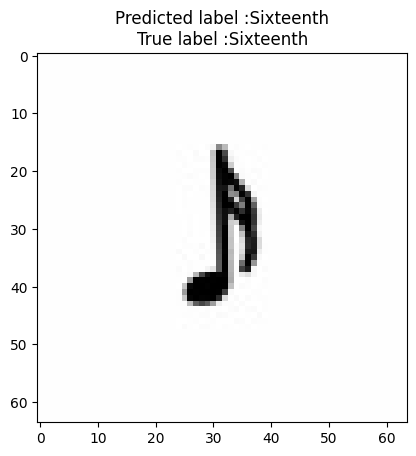

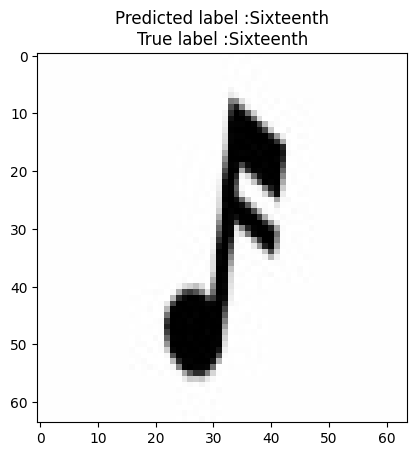

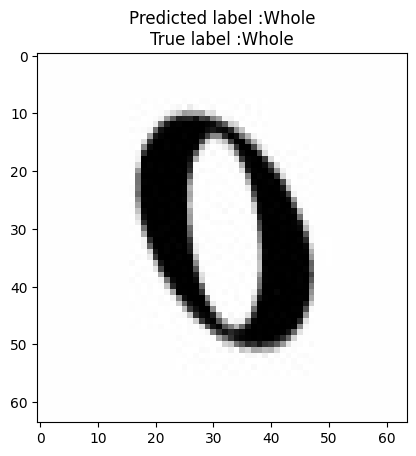

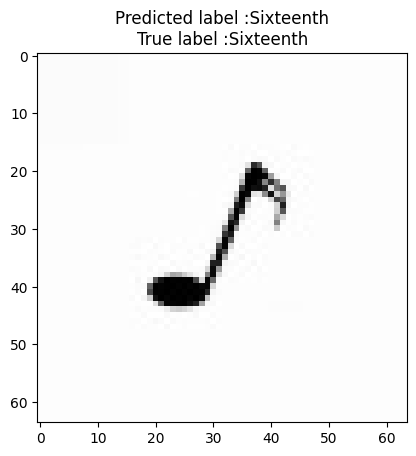

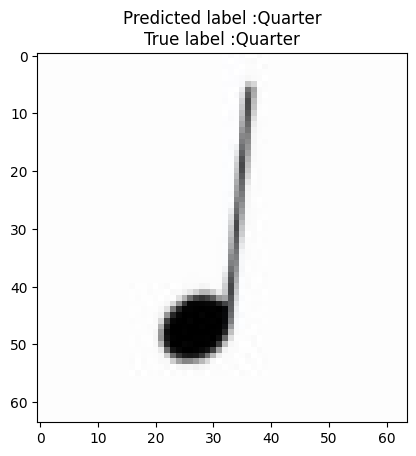

In [29]:
listed = list(np.where(test))
listed = listed[0].tolist()
listed = list(set(listed))
for x in range(0, 50) :
        img = mpimg.imread(test.iloc[listed[x]]['path'])
        predict_image = load_img(test.iloc[listed[x]]['path'], color_mode = "rgb", target_size=(224, 224))
        predict_image = np.array(predict_image, dtype = 'float32') 
        predict_image = 1-predict_image/127.5
        predict_image = predict_image.reshape(1,224,224,3)

        y1 = Music_Note_Classifier.predict(predict_image)
        plt.subplots()
        plt.imshow(img)
        prediction_answer = np.argmax(y1)
        plt.title("Predicted label :{}\nTrue label :{}".format(label_word[prediction_answer], label_word[test.iloc[int(listed[x])]['label']]))

# Mistakes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

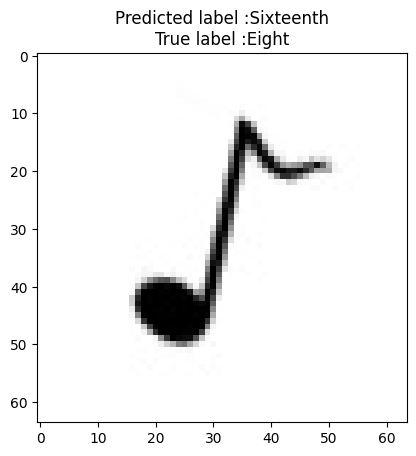

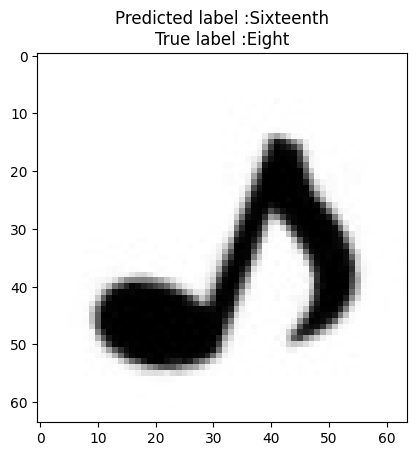

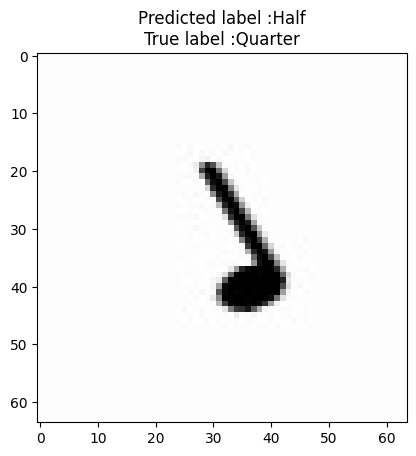

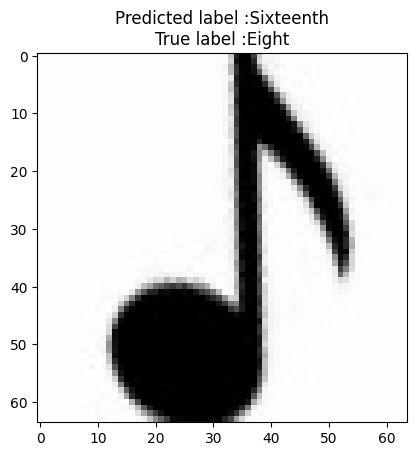

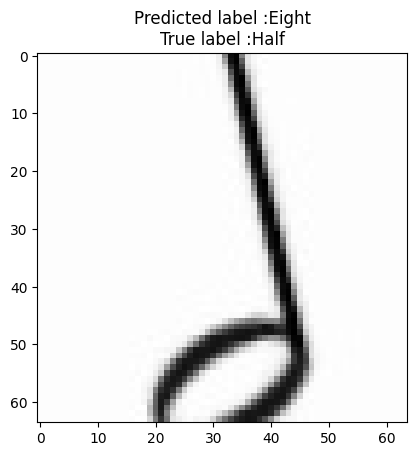

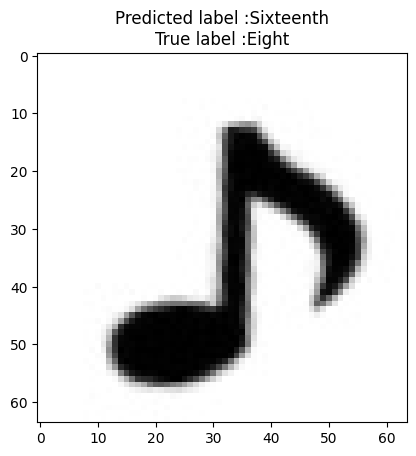

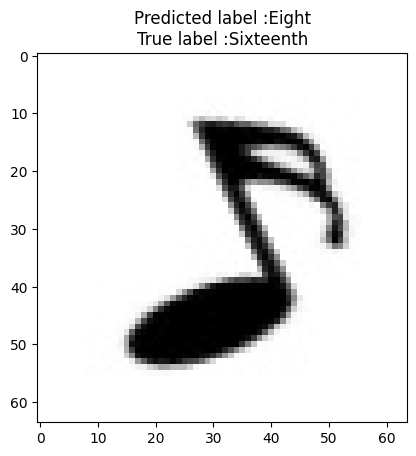

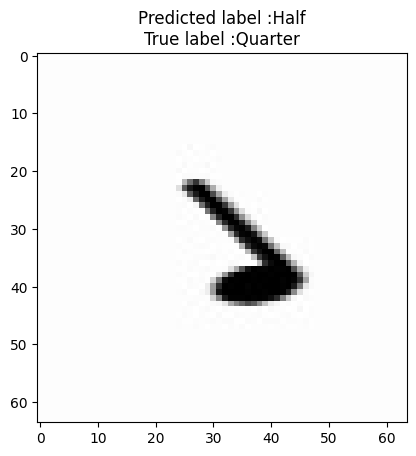

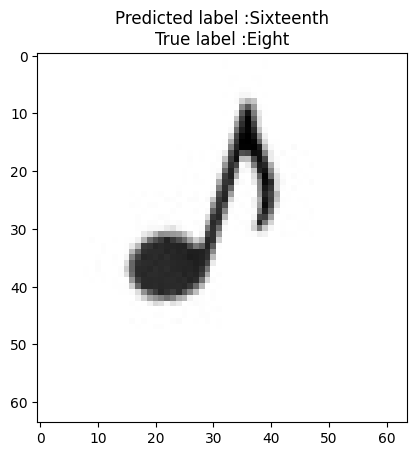

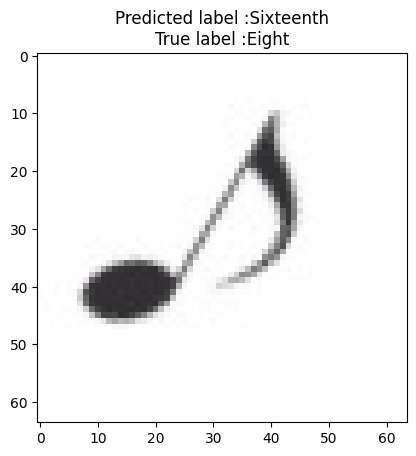

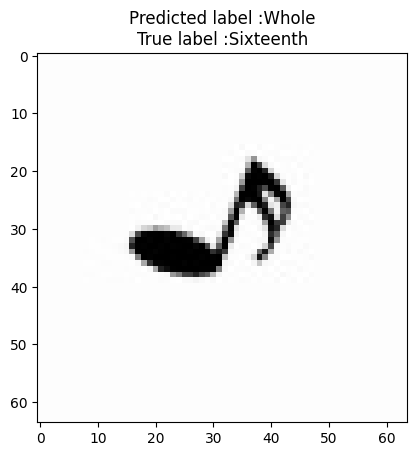

In [30]:
listed = list(np.where(test))
listed = listed[0].tolist()
listed = list(set(listed))
mistakes_count = 0
mistakes_class = [0, 0, 0, 0, 0]
for x in range(0, len(listed)) :
        img = mpimg.imread(test.iloc[listed[x]]['path'])
        predict_image = load_img(test.iloc[listed[x]]['path'], color_mode = "rgb", target_size=(224, 224))
        predict_image = np.array(predict_image, dtype = 'float32') 
        predict_image = 1-predict_image/127.5
        predict_image = predict_image.reshape(1,224,224,3)
        
        y1 = Music_Note_Classifier.predict(predict_image)
        prediction_answer = np.argmax(y1)
        if label_word[prediction_answer] != label_word[test.iloc[int(listed[x])]['label']] :
            mistakes_count += 1
            mistakes_class[test.iloc[int(listed[x])]['label']] += 1
            plt.subplots()
            plt.imshow(img)
            plt.title("Predicted label :{}\nTrue label :{}".format(label_word[prediction_answer], label_word[test.iloc[int(listed[x])]['label']]))
        else : continue

In [31]:
print("Number of Mistakes : ", mistakes_count)
print("Mistakes in Whole Note : ", mistakes_class[0])
print("Mistakes in Half Note : ", mistakes_class[1])
print("Mistakes in Quarter Note : ", mistakes_class[2])
print("Mistakes in Eight Note : ", mistakes_class[3])
print("Mistakes in Sixteenth Note : ", mistakes_class[4])

Number of Mistakes :  11
Mistakes in Whole Note :  0
Mistakes in Half Note :  1
Mistakes in Quarter Note :  2
Mistakes in Eight Note :  6
Mistakes in Sixteenth Note :  2
